Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [41]:
library(tidymodels)



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [42]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [43]:
#Glimpse the training Set
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 3, 8, 3, 6, 10, 11, 3, 7,…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 126, 99, 88, 92, …
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 88, 84, 58, 92, 78, 76…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 41, 0, 11, 0, 31, 0, 25, …
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 235, 0, 54, 0, 0, 0, 70, 0…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 39.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.7…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 27, 50, 22, 28, 45, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

**The variable 'Outcome' is a suitable variable in a logistic regression model, since it is a binary variable (1 = yes, 0 = no)**

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |             |
| BMI         |             |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

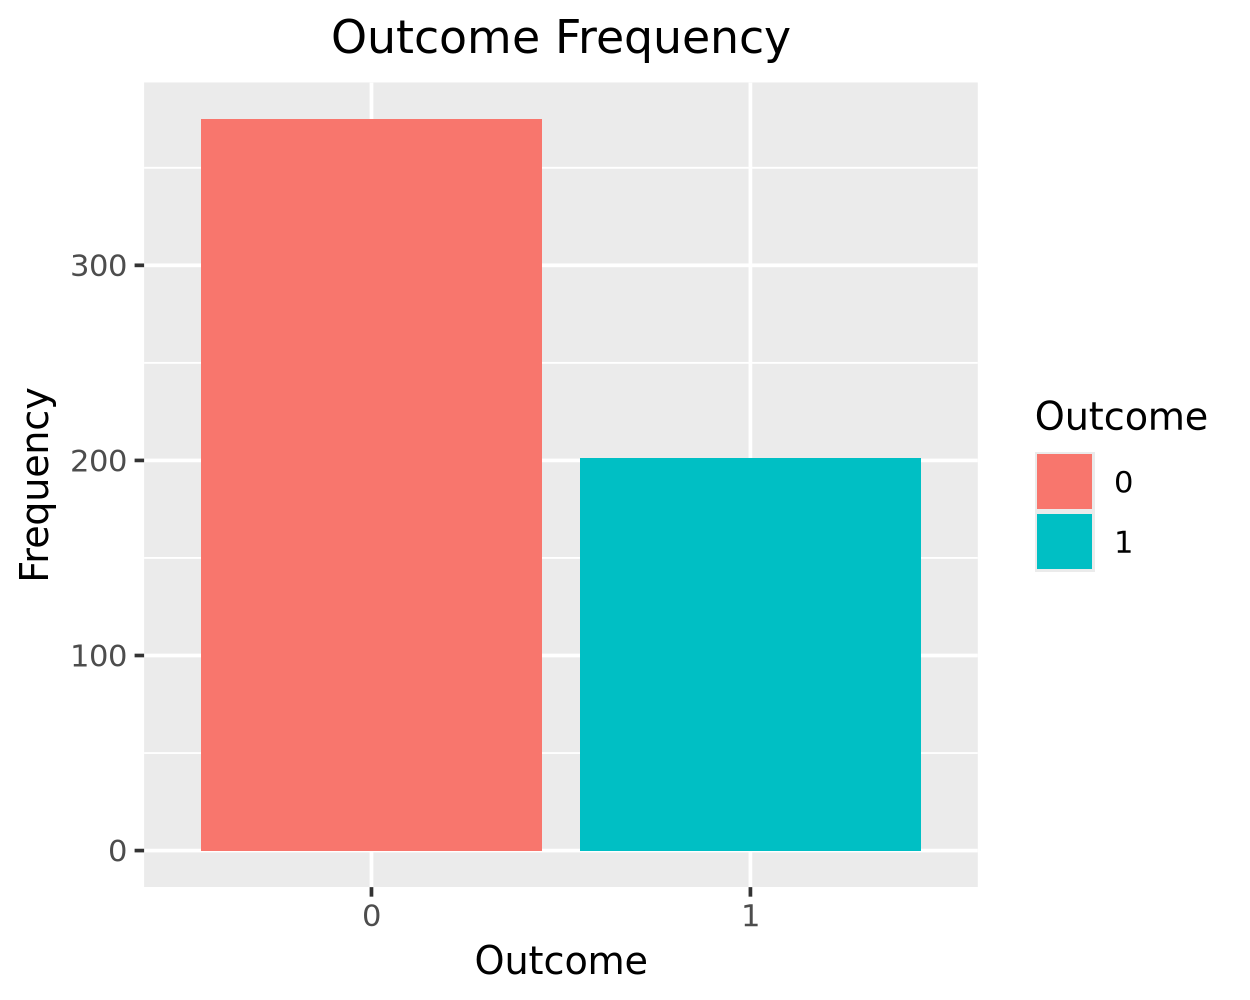

In [44]:
ggplot(diabetes_train, aes(x = Outcome, fill = Outcome)) +
    geom_bar() + 
    labs(title ="Outcome Frequency", x = "Outcome", y = "Frequency") + 
    #Center Title 
    theme(plot.title = element_text(hjust = 0.5)) 
    #Set Bar colors based on Outcome value


❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

**The data is not balanced, the frequency is much higher for outcomes reulting in 0**



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [45]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

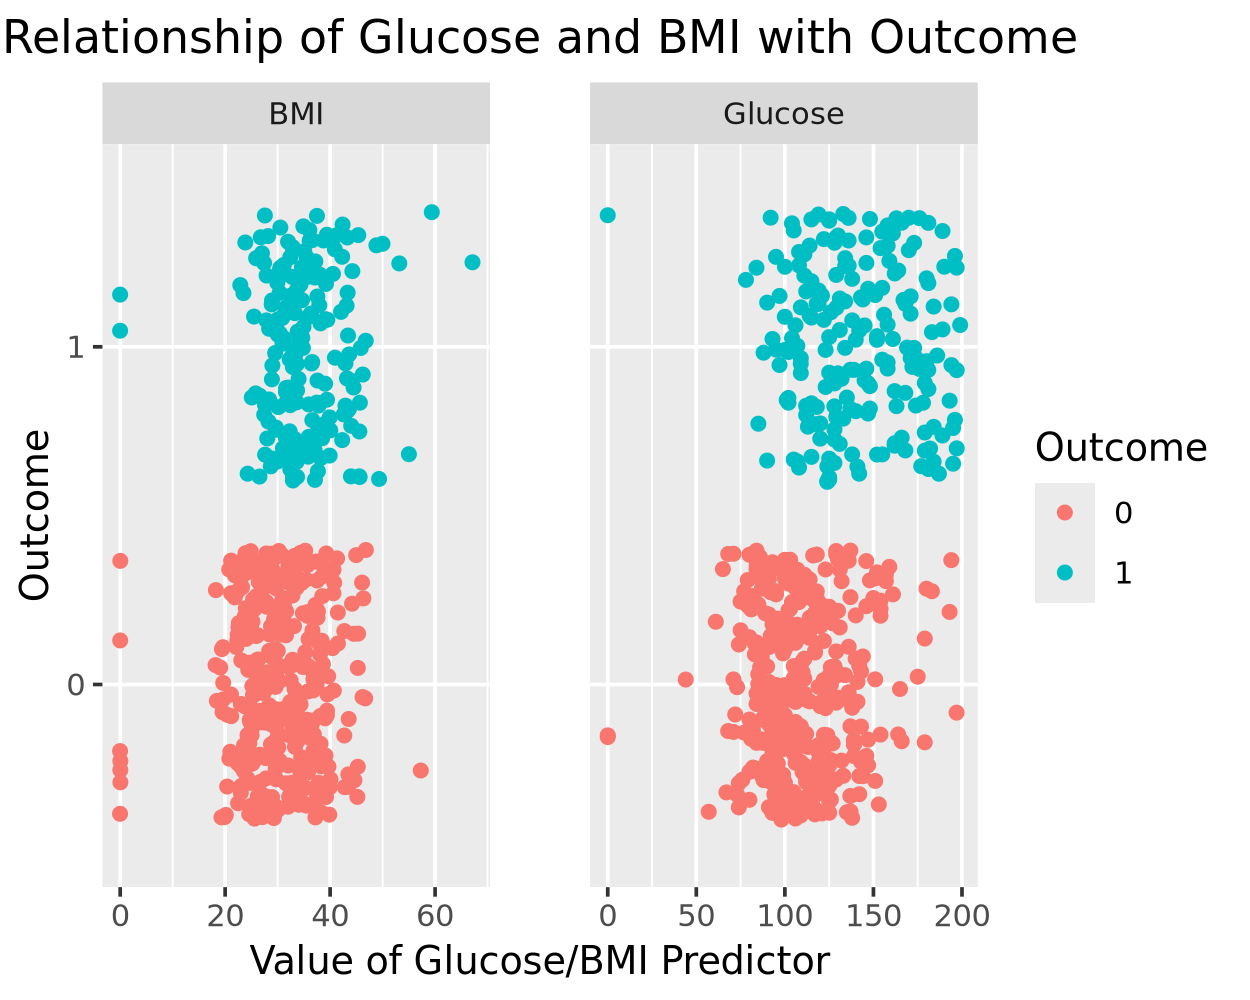

In [46]:
ggplot(plot_df, aes(x= value, y= Outcome, color= Outcome)) +
    geom_jitter() + 
    labs(title = "Relationship of Glucose and BMI with Outcome", 
         x = "Value of Glucose/BMI Predictor", 
         y = "Outcome") +
    #Split the graph into sublplots by the name column 
    facet_wrap(~ name, ncol = 2, scales = 'free_x') +
    #Adjust spacing between subplots
    theme(panel.spacing = unit(2, "lines")) +
    #Center the Title 
    theme(plot.title = element_text(hjust = 0.5))



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

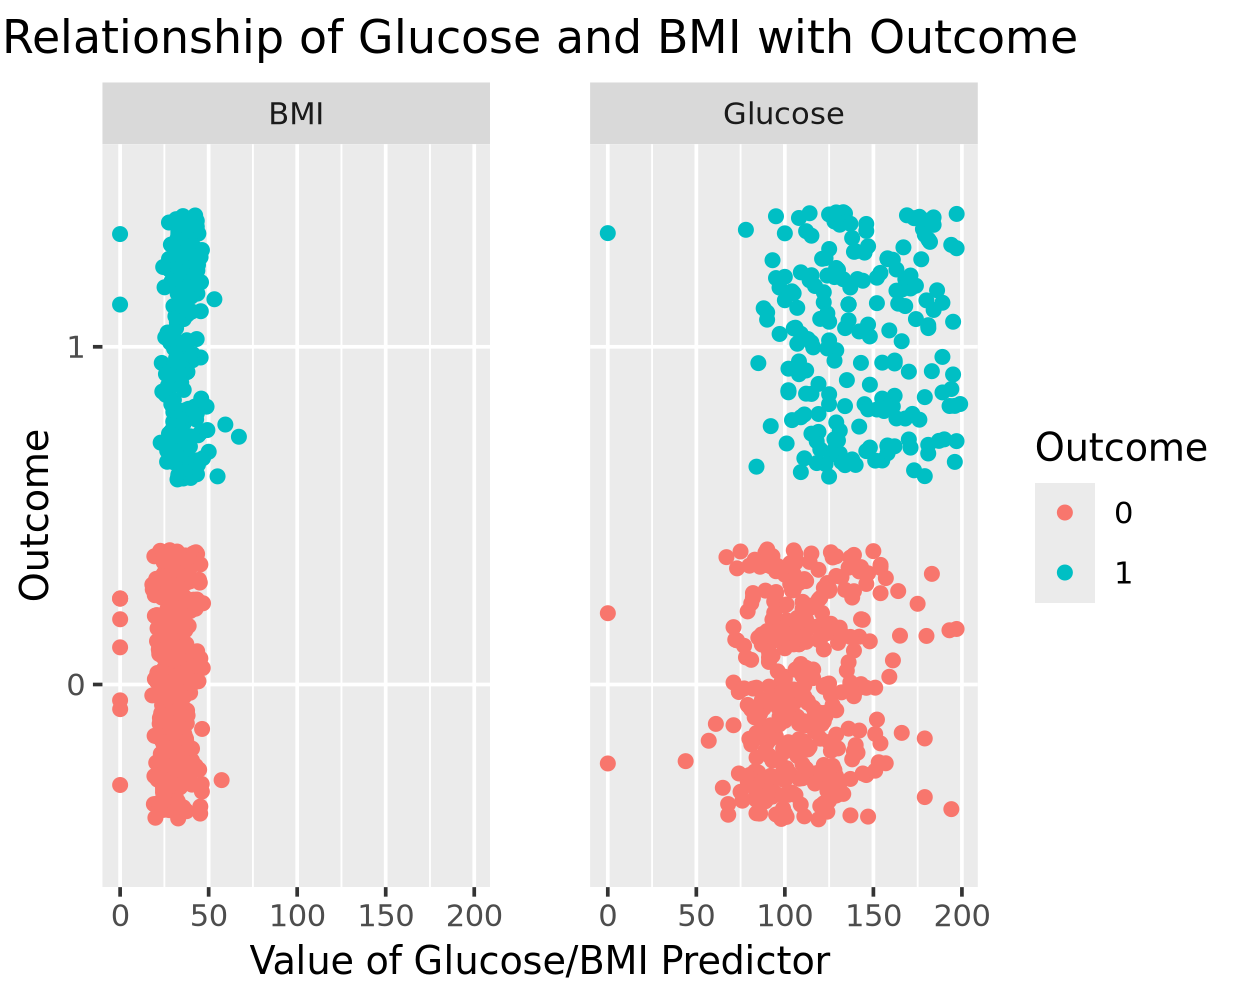

In [47]:
ggplot(plot_df, aes(x= value, y= Outcome, color= Outcome)) +
    geom_jitter() + 
    labs(title = "Relationship of Glucose and BMI with Outcome", 
         x = "Value of Glucose/BMI Predictor", 
         y = "Outcome") +
    #Split the graph into sublplots by the name column 
    facet_wrap(~ name, ncol = 2) +
    #Adjust spacing between subplots
    theme(panel.spacing = unit(2, "lines")) +
    #Center the Title 
    theme(plot.title = element_text(hjust = 0.5))


**When removing scales = 'free_x' argument, the x tick values would be the same for both sublots.**

**We can see that this affects the BMI sublot, as the data points are very cluttered.**

**It appears that scales = 'free_x' automatically scales the x-axis of each subplot for maximum clarity**

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [48]:
#Create the logistic regression model 
mod <- logistic_reg() |> set_engine("glm")
#Fit the Model 
mod_fit <- mod |>
    fit(Outcome ~ BMI + Glucose, data = diabetes_train)


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [55]:
diabetes_test_wPred <- augment(mod_fit, new_data = diabetes_test)

glimpse(diabetes_test_wPred)

Rows: 192
Columns: 12
$ .pred_class              <fct> 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, …
$ .pred_0                  <dbl> 0.30906846, 0.85016287, 0.81881314, 0.6347081…
$ .pred_1                  <dbl> 0.690931543, 0.149837135, 0.181186856, 0.3652…
$ Pregnancies              <dbl> 8, 7, 7, 1, 7, 1, 13, 5, 5, 4, 7, 7, 0, 2, 7,…
$ Glucose                  <dbl> 183, 100, 107, 103, 196, 97, 145, 117, 109, 1…
$ BloodPressure            <dbl> 64, 0, 74, 30, 90, 66, 82, 92, 75, 60, 84, 92…
$ SkinThickness            <dbl> 0, 0, 0, 38, 0, 15, 19, 0, 26, 33, 0, 18, 39,…
$ Insulin                  <dbl> 0, 0, 0, 83, 0, 140, 110, 0, 0, 192, 0, 0, 0,…
$ BMI                      <dbl> 23.3, 30.0, 29.6, 43.3, 39.8, 23.2, 22.2, 34.…
$ DiabetesPedigreeFunction <dbl> 0.672, 0.484, 0.254, 0.183, 0.451, 0.487, 0.2…
$ Age                      <dbl> 32, 32, 31, 33, 41, 22, 57, 38, 60, 33, 37, 4…
$ Outcome                  <fct> 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, …


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [56]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 104  28
         1  21  39

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

1. **67** individuals had diabetes in the test data.

2. Of those that actually had diabetes, **39** individuals were predicted to have diabetes.

3. **21** individuals were predicted to have diabetes did not actually have diabetes.